# Environment

In [1]:
import pandas as pd
import yaml
import os
import sys
import importlib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load config
CONFIG_PATH = "/beegfs/scratch/ric.broccoli/kubacki.michal/SRF_MeCP2_CUTandTAG/iterative_alternative/code7_cpg_enrichment/config.yaml"

# Specify which configuration to use (1-based index)
# Change this to select different configurations
CONFIG_NUMBER = 5

with open(CONFIG_PATH, 'r') as f:
    # Load all documents from the YAML file
    configs = list(yaml.safe_load_all(f))

# Select the specific configuration (subtract 1 because list is 0-based)
config = configs[CONFIG_NUMBER - 1]

# Get values from the selected config
BASE_DIR = config['base_dir']
RUN_NAME = config['run_name']
CELL_TYPE = config['cell_type']
ALIGNMENT_TYPE = config['alignment_type']
PEAKS_TYPE = config['peaks_type']

ENRICHMENT_FILE = f"{BASE_DIR}/results/{ALIGNMENT_TYPE}/cpg_enrichment/{CELL_TYPE}/{PEAKS_TYPE}/{RUN_NAME}/cpg_enrichment_parallel.csv"
print(ENRICHMENT_FILE)

# Set pandas display options to show all columns without wrapping
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)        # Don't wrap wide DataFrames
pd.set_option('display.max_colwidth', None) # Don't truncate column contents

sys.path.append("/beegfs/scratch/ric.broccoli/kubacki.michal/SRF_MeCP2_CUTandTAG/iterative_alternative/code7_cpg_enrichment")
try:
    import functions
    importlib.reload(functions)
    from functions import *
except ModuleNotFoundError:
    print("Warning: Could not import functions module. Make sure functions.py exists in the code7_cpg_enrichment directory.")


/beegfs/scratch/ric.broccoli/kubacki.michal/SRF_MeCP2_CUTandTAG/iterative_alternative/results/no_dedup/cpg_enrichment/Neu/broad/cpg_enrichment_1_rep_in_cpg/cpg_enrichment_parallel.csv


# Load Data

In [2]:
# Load the CpG enrichment results
cpg_enrichment_df = pd.read_csv(ENRICHMENT_FILE)

In [3]:
# Display first few rows and basic info
print("DataFrame shape:", cpg_enrichment_df.shape)
print("\nFirst few rows:")
display(cpg_enrichment_df.head())
print("\nColumn names:")
print(cpg_enrichment_df.columns.tolist())

DataFrame shape: (15156, 32)

First few rows:


,chr,start,end,cpg_length,cpg_name,cpg_score,exo_signal,endo_signal,enrichment,pvalue,binding_type,binding_type_by_peaks,significant,exo_replicates_with_signal,endo_replicates_with_signal,total_exo_replicates,total_endo_replicates,exo_replicate_signals,endo_replicate_signals,n_exo_peaks,n_endo_peaks,exo_peak_scores_by_rep,endo_peak_scores_by_rep,analysis_start,analysis_end,analysis_length,exo_signal_std,endo_signal_std,exo_signal_cv,endo_signal_cv,exo_replicates_with_peaks,endo_replicates_with_peaks
0,chr1,3670619,3671074,455,613,CpG:,37.940533,39.747068,0.954549,0.500000,both,both,False,3,1,3,2,"32.34496787354186,27.57420218541072,53.90242758321238","0.0,79.49413669711942",1,0,6.08946;8.05807;5.49517,12.1862,3670619,3671074,455,11.453576,39.747068,0.301882,1.000000,3,1
1,chr1,3671654,3672156,502,613,CpG:,91.426571,60.223449,1.518122,1.000000,both,both,False,3,2,3,2,"65.91187516626609,100.02656144829861,108.34127548111387","8.037706496706047,112.40919069654913",1,1,6.08946;8.05807;5.49517,14.2013;12.1862,3671654,3672156,502,18.358166,52.185742,0.200797,0.866535,3,2
2,chr1,4496947,4497608,661,619,CpG:,7.106205,16.042076,0.442973,0.666667,both,both,False,2,1,3,2,"4.4972352887787,16.821379846235267,0.0","0.0,32.084152412125995",1,0,3.0083,4.61906,4496947,4497608,661,7.110778,16.042076,1.000644,1.000000,1,1
3,chr1,4571641,4572075,434,619,CpG:,22.484732,26.613610,0.844858,1.000000,both,both,False,3,2,3,2,"21.50187462705621,16.938446890923284,29.013874656044393","2.135811282742408,51.09140839994228",1,0,3.91321;3.39512;3.76449,4.05345,4571641,4572075,434,4.978520,24.477799,0.221418,0.919747,3,1
4,chr1,4689184,4689397,213,620,CpG:,12.264443,1.365873,8.979196,0.500000,both,endo_only,False,3,1,3,2,"17.313083109161663,3.3228239543001417,16.157423256708423","0.0,2.731746449716774",0,1,NaN,3.96057,4689184,4689397,213,6.340258,1.365873,0.516963,1.000000,0,1



Column names:
['chr', 'start', 'end', 'cpg_length', 'cpg_name', 'cpg_score', 'exo_signal', 'endo_signal', 'enrichment', 'pvalue', 'binding_type', 'binding_type_by_peaks', 'significant', 'exo_replicates_with_signal', 'endo_replicates_with_signal', 'total_exo_replicates', 'total_endo_replicates', 'exo_replicate_signals', 'endo_replicate_signals', 'n_exo_peaks', 'n_endo_peaks', 'exo_peak_scores_by_rep', 'endo_peak_scores_by_rep', 'analysis_start', 'analysis_end', 'analysis_length', 'exo_signal_std', 'endo_signal_std', 'exo_signal_cv', 'endo_signal_cv', 'exo_replicates_with_peaks', 'endo_replicates_with_peaks']


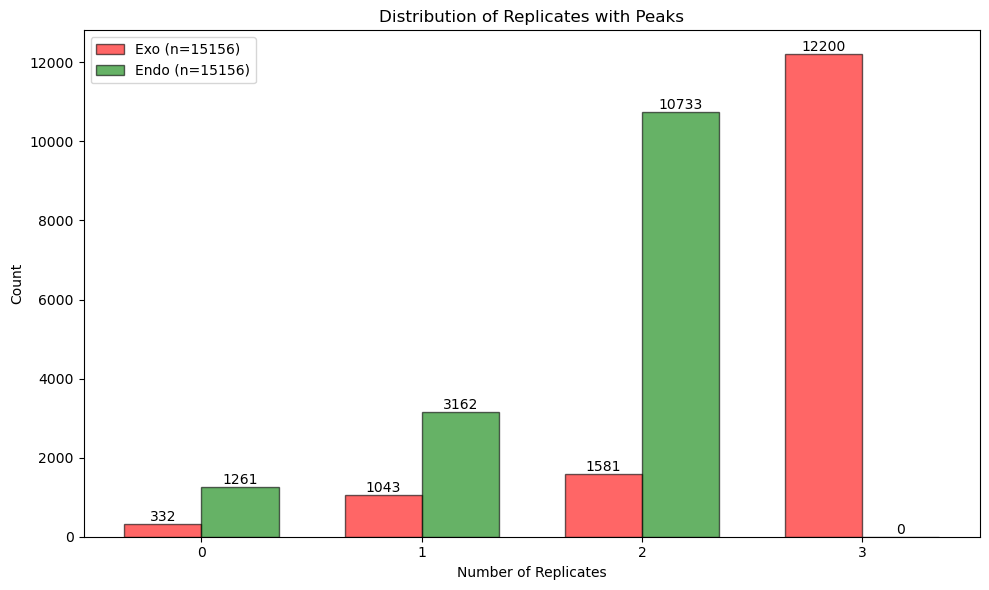

In [4]:
# Create single plot
plt.figure(figsize=(10, 6))

# Get data for plotting
x = np.arange(4)  # 0 through 3 replicates
exo_counts = [len(cpg_enrichment_df[cpg_enrichment_df['exo_replicates_with_peaks'] == i]) for i in range(4)]
endo_counts = [len(cpg_enrichment_df[cpg_enrichment_df['endo_replicates_with_peaks'] == i]) for i in range(4)]

# Plot bars side by side
width = 0.35
plt.bar(x - width/2, exo_counts, width, label=f'Exo (n={sum(exo_counts)})', color='red', alpha=0.6, edgecolor='black')
plt.bar(x + width/2, endo_counts, width, label=f'Endo (n={sum(endo_counts)})', color='green', alpha=0.6, edgecolor='black')

# Add value labels on top of each bar
for i in range(len(x)):
    plt.text(x[i] - width/2, exo_counts[i], str(exo_counts[i]), 
             ha='center', va='bottom')
    plt.text(x[i] + width/2, endo_counts[i], str(endo_counts[i]),
             ha='center', va='bottom')

plt.title('Distribution of Replicates with Peaks')
plt.xlabel('Number of Replicates')
plt.ylabel('Count')
plt.xticks(x)
plt.legend()

plt.tight_layout()
plt.show()

In [5]:
# Sort the DataFrame by enrichment value in descending order
cpg_enrichment_df_sorted = cpg_enrichment_df.sort_values(by='enrichment', ascending=False)

# Split data based on binding type

## By signal value

Non zero signal in minumum 2 replicates

In [6]:
# Split data based on binding type
exo_only_df_by_signal = cpg_enrichment_df_sorted[cpg_enrichment_df_sorted['binding_type'] == 'exo_only']
endo_only_df_by_signal = cpg_enrichment_df_sorted[cpg_enrichment_df_sorted['binding_type'] == 'endo_only'] 
both_df_by_signal = cpg_enrichment_df_sorted[cpg_enrichment_df_sorted['binding_type'] == 'both']

# Print sizes of each group
print(f"Number of CpG islands bound by exo only: {len(exo_only_df_by_signal)}")
print(f"Number of CpG islands bound by endo only: {len(endo_only_df_by_signal)}")
print(f"Number of CpG islands bound by both: {len(both_df_by_signal)}")


Number of CpG islands bound by exo only: 747
Number of CpG islands bound by endo only: 13
Number of CpG islands bound by both: 14396


## By peaks number

Minimum 2 replicates with peaks

In [7]:
# Split data based on binding type
exo_only_df_by_peaks = cpg_enrichment_df_sorted[cpg_enrichment_df_sorted['binding_type_by_peaks'] == 'exo_only']
endo_only_df_by_peaks = cpg_enrichment_df_sorted[cpg_enrichment_df_sorted['binding_type_by_peaks'] == 'endo_only'] 
both_df_by_peaks = cpg_enrichment_df_sorted[cpg_enrichment_df_sorted['binding_type_by_peaks'] == 'both']

# Print sizes of each group
print(f"Number of CpG islands bound by exo only: {len(exo_only_df_by_peaks)}")
print(f"Number of CpG islands bound by endo only: {len(endo_only_df_by_peaks)}")
print(f"Number of CpG islands bound by both: {len(both_df_by_peaks)}")


Number of CpG islands bound by exo only: 1261
Number of CpG islands bound by endo only: 332
Number of CpG islands bound by both: 13563


# Data analysis

## Both: enrichment distribution

In [8]:
print("Summary statistics of enrichment values selected by signal:")
print(both_df_by_signal['enrichment'].describe())

print("\nSummary statistics of enrichment values selected by peaks:")
print(both_df_by_peaks['enrichment'].describe())

Summary statistics of enrichment values selected by signal:
count    14396.000000
mean         3.753790
std         53.844570
min          0.000514
25%          0.799548
50%          1.221749
75%          1.858181
max       5368.168927
Name: enrichment, dtype: float64

Summary statistics of enrichment values selected by peaks:
count    1.356300e+04
mean              inf
std               NaN
min      0.000000e+00
25%      8.108339e-01
50%      1.215324e+00
75%      1.799380e+00
max               inf
Name: enrichment, dtype: float64


/beegfs/scratch/ric.broccoli/kubacki.michal/conda_envs/snakemake/lib/python3.11/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


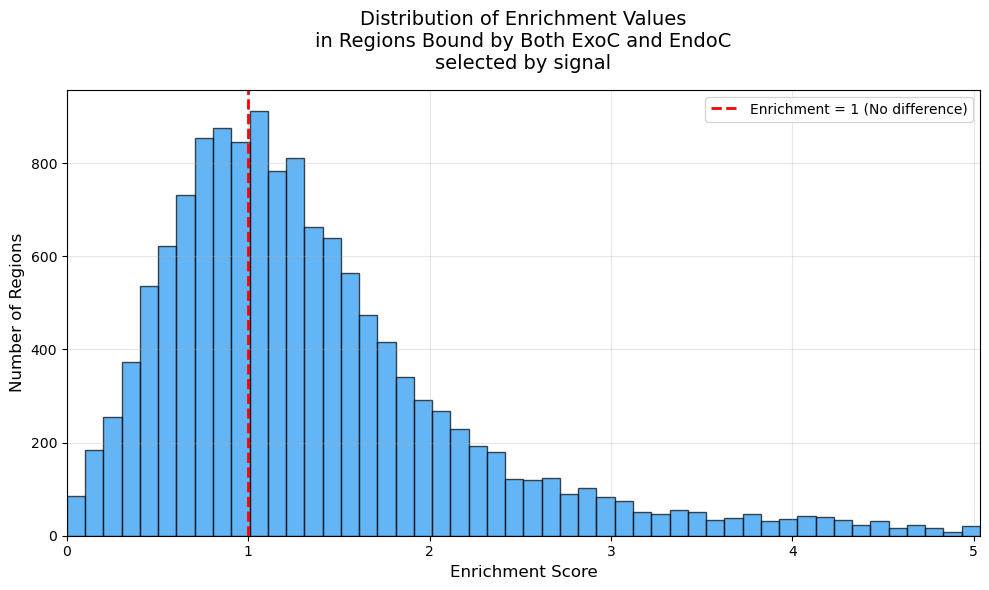

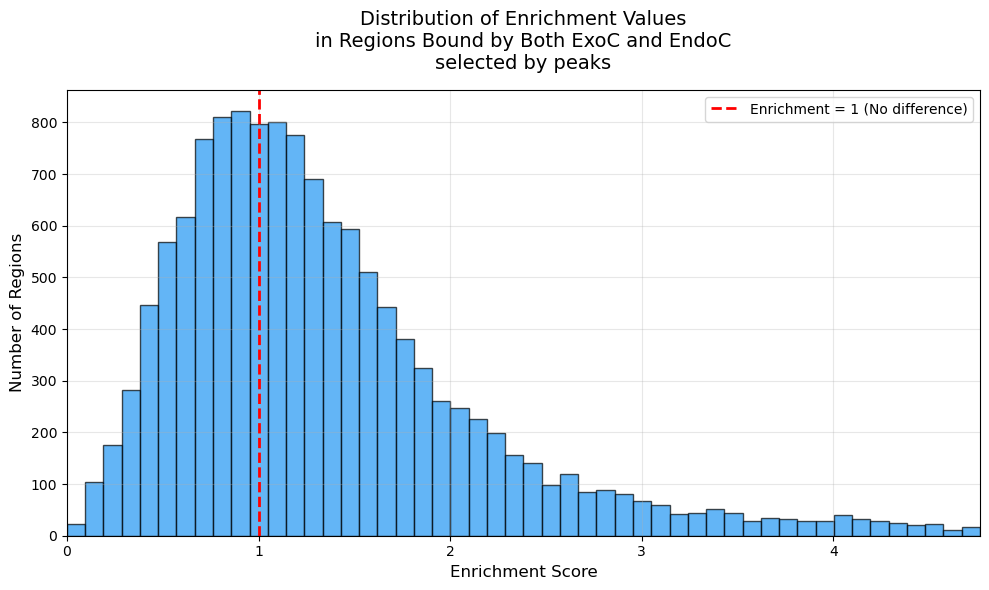

In [9]:
range_min_signal, range_max_signal = plot_enrichment_distribution(both_df_by_signal, title="selected by signal")
range_min_peaks, range_max_peaks = plot_enrichment_distribution(both_df_by_peaks, title="selected by peaks")


## Both: enrichment outliers

In [10]:
outliers_df_signal = both_df_by_signal[both_df_by_signal['enrichment'] > range_max_signal].copy()
print(f"\nNumber of outliers selected by signal(enrichment > {range_max_signal}):", len(outliers_df_signal))

outliers_df_peaks = both_df_by_peaks[both_df_by_peaks['enrichment'] > range_max_peaks].copy()
print(f"\nNumber of outliers selected by peaks(enrichment > {range_max_peaks}):", len(outliers_df_peaks))


Number of outliers selected by signal(enrichment > 5.0340810508724205): 900

Number of outliers selected by peaks(enrichment > 4.7650178263968535): 674


In [11]:
outliers_df_signal.head()

,chr,start,end,cpg_length,cpg_name,cpg_score,exo_signal,endo_signal,enrichment,pvalue,binding_type,binding_type_by_peaks,significant,exo_replicates_with_signal,endo_replicates_with_signal,total_exo_replicates,total_endo_replicates,exo_replicate_signals,endo_replicate_signals,n_exo_peaks,n_endo_peaks,exo_peak_scores_by_rep,endo_peak_scores_by_rep,analysis_start,analysis_end,analysis_length,exo_signal_std,endo_signal_std,exo_signal_cv,endo_signal_cv,exo_replicates_with_peaks,endo_replicates_with_peaks
12416,chr7,46100675,46100883,208,936,CpG:,86.970922,0.016201,5368.168927,0.5,both,both,False,3,1,3,2,"38.8960925409427,57.00657127453731,165.01010236373315","0.0,0.03240245351424584",1,1,4.94638;18.6686;8.18942,8.01935,46100675,46100883,208,55.675145,0.016201,0.640158,1.0,3,1
13870,chr8,123332639,123333155,516,1525,CpG:,12.450568,0.006531,1906.456951,0.5,both,both,False,3,1,3,2,"8.35233680037565,12.957347433696421,16.04201863902484","0.0,0.013061472611833913",1,1,4.74809;5.53757;4.99125,8.84848;5.0604,123332639,123333155,516,3.159686,0.006531,0.253778,1.0,3,2
8954,chr3,105458909,105459252,343,1389,CpG:,35.207135,0.019649,1791.772860,0.5,both,exo_only,False,3,1,3,2,"41.38825124623824,28.599354529867366,35.63379780822176","0.0,0.039298658120736435",1,0,4.001;8.13881;3.65898,NaN,105458909,105459252,343,5.229755,0.019649,0.148542,1.0,3,0
12997,chr7,141481953,141482428,475,1664,CpG:,16.028987,0.016554,968.303844,0.5,both,exo_only,False,3,1,3,2,"13.275075852243523,7.753088215275815,27.058795860692076","0.0,0.03310734899420487",0,0,7.22038;7.39014,NaN,141481953,141482428,475,8.118522,0.016554,0.506490,1.0,2,0
13377,chr8,70852629,70853049,420,1125,CpG:,24.748343,0.029419,841.225178,0.5,both,exo_only,False,3,1,3,2,"12.94911980061304,42.437598097892035,18.85831219809396","0.0,0.05883880796886626",1,0,3.4627;2.4851,NaN,70852629,70853049,420,12.738706,0.029419,0.514730,1.0,2,0


In [12]:
print_outlier_groups(outliers_df_signal, "signal")


First 5 outliers selected by signal:
chr7:46,100,675-46,100,883                        enrichment: 5368.1689271771165
chr8:123,332,639-123,333,155                      enrichment: 1906.4569508165887
chr3:105,458,909-105,459,252                      enrichment: 1791.7728600270773
chr7:141,481,953-141,482,428                      enrichment: 968.3038436899832
chr8:70,852,629-70,853,049                        enrichment: 841.2251784104211

Middle 5 outliers selected by signal:
chr11:104,132,524-104,133,862                     enrichment: 10.36869269278556
chr4:140,109,300-140,109,581                      enrichment: 10.355811010552436
chr13:47,122,519-47,123,195                       enrichment: 10.224998091192052
chr2:129,038,833-129,039,540                      enrichment: 10.215460026246904
chr2:124,089,901-124,090,365                      enrichment: 10.18682921186442

Last 5 outliers selected by signal:
chr13:100,616,515-100,617,016                     enrichment: 5.065441601407062


In [13]:
n_rows = len(outliers_df_signal)

print("\nFirst 5 outliers selected by signal:")
for _, row in outliers_df_signal[:5].iterrows():
    print(f"{row['chr']}:{row['start']:,}-{row['end']:,}".ljust(50) + f"enrichment: {row['enrichment']}")

if n_rows > 10:
    mid_start = n_rows//2 - 2
    print("\nMiddle 5 outliers selected by signal:")
    for _, row in outliers_df_signal[mid_start:mid_start+5].iterrows():
        print(f"{row['chr']}:{row['start']:,}-{row['end']:,}".ljust(50) + f"enrichment: {row['enrichment']}")

print("\nLast 5 outliers selected by signal:")
for _, row in outliers_df_signal[-5:].iterrows():
    print(f"{row['chr']}:{row['start']:,}-{row['end']:,}".ljust(50) + f"enrichment: {row['enrichment']}")


First 5 outliers selected by signal:
chr7:46,100,675-46,100,883                        enrichment: 5368.1689271771165
chr8:123,332,639-123,333,155                      enrichment: 1906.4569508165887
chr3:105,458,909-105,459,252                      enrichment: 1791.7728600270773
chr7:141,481,953-141,482,428                      enrichment: 968.3038436899832
chr8:70,852,629-70,853,049                        enrichment: 841.2251784104211

Middle 5 outliers selected by signal:
chr11:104,132,524-104,133,862                     enrichment: 10.36869269278556
chr4:140,109,300-140,109,581                      enrichment: 10.355811010552436
chr13:47,122,519-47,123,195                       enrichment: 10.224998091192052
chr2:129,038,833-129,039,540                      enrichment: 10.215460026246904
chr2:124,089,901-124,090,365                      enrichment: 10.18682921186442

Last 5 outliers selected by signal:
chr13:100,616,515-100,617,016                     enrichment: 5.065441601407062


In [14]:
print_outlier_groups(outliers_df_peaks, "peaks")


First 5 outliers selected by peaks:
chr1:9,848,165-9,848,530                          enrichment: inf
chr12:112,909,106-112,909,372                     enrichment: inf
chr8:44,951,615-44,951,884                        enrichment: inf
chr13:43,200,971-43,201,218                       enrichment: inf
chr4:135,398,084-135,398,364                      enrichment: inf

Middle 5 outliers selected by peaks:
chr11:98,741,717-98,742,336                       enrichment: 9.665096547934915
chr11:77,766,609-77,766,836                       enrichment: 9.662663949053066
chr15:98,762,433-98,763,412                       enrichment: 9.554449465987403
chr1:34,849,895-34,850,178                        enrichment: 9.54073083493998
chr5:124,578,923-124,579,237                      enrichment: 9.523300736229428

Last 5 outliers selected by peaks:
chr11:89,298,363-89,298,738                       enrichment: 4.790745460357844
chr17:29,842,083-29,842,375                       enrichment: 4.772131185730892


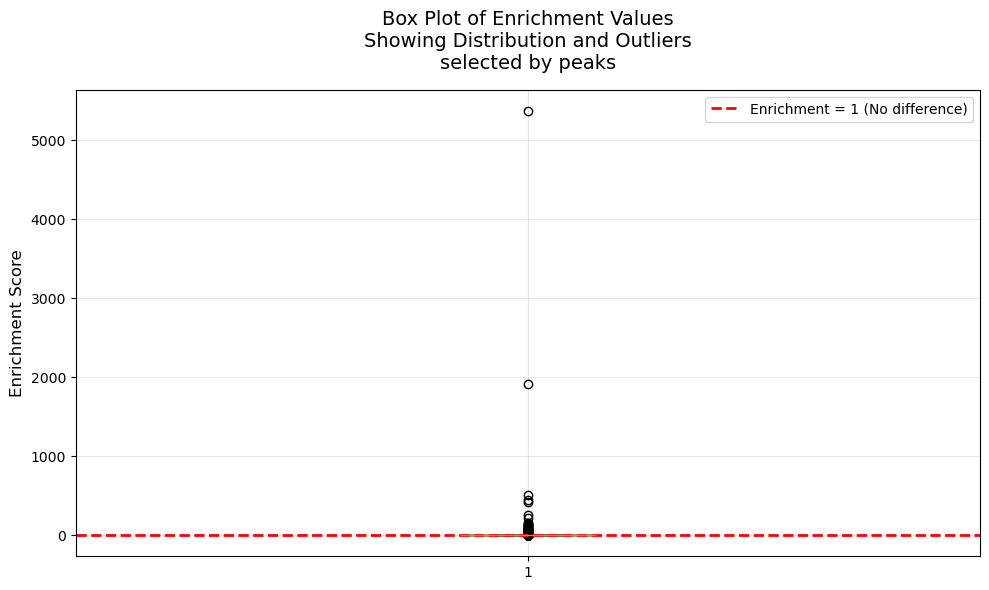

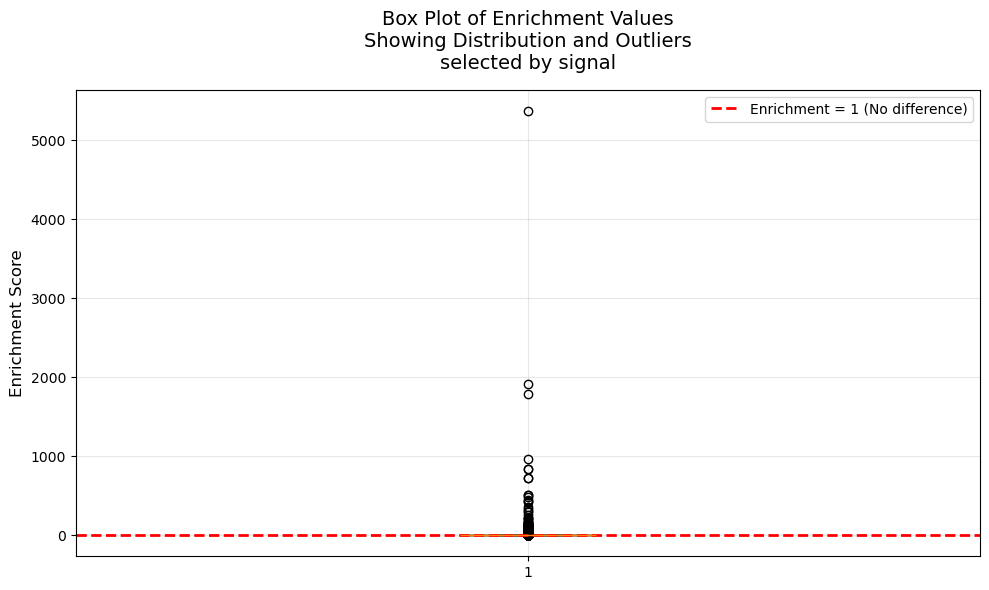

In [15]:
plot_enrichment_boxplot(both_df_by_peaks, title="selected by peaks")
plot_enrichment_boxplot(both_df_by_signal, title="selected by signal")

In [16]:
outliers_df_signal["endo_replicates_with_peaks"].value_counts()

signal_endo_zero_peaks  = outliers_df_signal[outliers_df_signal["endo_replicates_with_peaks"] == 0]
signal_endo_one_peaks   = outliers_df_signal[outliers_df_signal["endo_replicates_with_peaks"] == 1]
signal_endo_two_peaks   = outliers_df_signal[outliers_df_signal["endo_replicates_with_peaks"] == 2]
signal_endo_three_peaks = outliers_df_signal[outliers_df_signal["endo_replicates_with_peaks"] == 3]

outliers_df_peaks["endo_replicates_with_peaks"].value_counts()

peaks_endo_zero_peaks  = outliers_df_peaks[outliers_df_peaks["endo_replicates_with_peaks"] == 0]
peaks_endo_one_peaks   = outliers_df_peaks[outliers_df_peaks["endo_replicates_with_peaks"] == 1]
peaks_endo_two_peaks   = outliers_df_peaks[outliers_df_peaks["endo_replicates_with_peaks"] == 2]
peaks_endo_three_peaks = outliers_df_peaks[outliers_df_peaks["endo_replicates_with_peaks"] == 3]

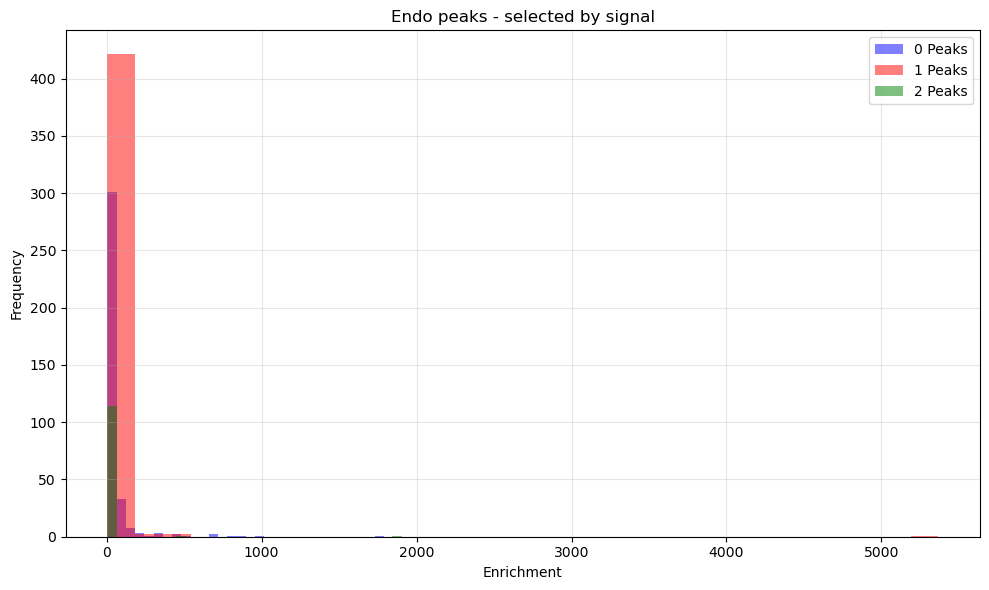

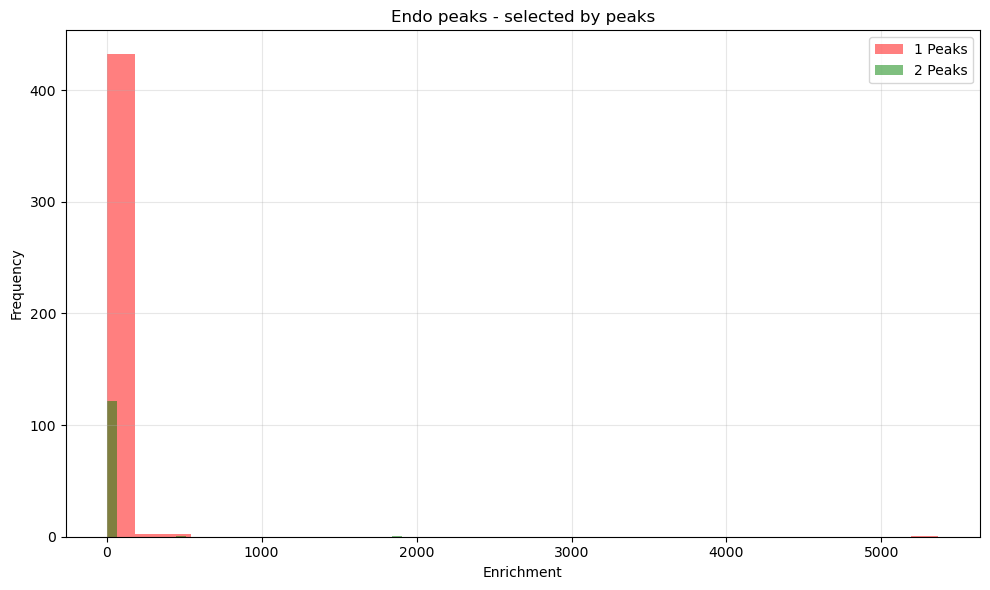

In [17]:
# Classify and plot for signal and peaks outliers
peaks_zero_peaks_signal, peaks_one_peaks_signal, peaks_two_peaks_signal, peaks_three_peaks_signal = plot_by_peaks(outliers_df_signal, peaks_column='endo_replicates_with_peaks', title="Endo peaks - selected by signal")
peaks_zero_peaks_peaks, peaks_one_peaks_peaks, peaks_two_peaks_peaks, peaks_three_peaks_peaks = plot_by_peaks(outliers_df_peaks, peaks_column='endo_replicates_with_peaks', title="Endo peaks - selected by peaks")

In [18]:
print_outlier_groups(peaks_two_peaks_peaks, "peaks")


First 5 outliers selected by peaks:
chr1:89,928,656-89,928,995                        enrichment: inf
chr7:45,785,616-45,785,898                        enrichment: inf
chr16:17,200,952-17,201,416                       enrichment: inf
chr11:95,796,604-95,796,890                       enrichment: inf
chr7:27,446,440-27,446,740                        enrichment: inf

Middle 5 outliers selected by peaks:
chr7:5,030,199-5,031,983                          enrichment: 8.085579559528266
chr1:182,516,998-182,517,820                      enrichment: 8.011839894941861
chr4:130,308,413-130,308,909                      enrichment: 7.931736015425649
chr10:93,310,112-93,310,563                       enrichment: 7.916557921482053
chr9:108,339,817-108,340,089                      enrichment: 7.847495541954284

Last 5 outliers selected by peaks:
chr10:128,673,785-128,673,993                     enrichment: 4.921237090920653
chr1:86,587,037-86,587,467                        enrichment: 4.861485046786573

In [19]:
print_outlier_groups(peaks_two_peaks_signal, "signal")


First 5 outliers selected by signal:
chr8:123,332,639-123,333,155                      enrichment: 1906.4569508165887
chr15:99,223,721-99,224,863                       enrichment: 511.058773048827
chr19:7,612,344-7,612,763                         enrichment: 64.49697756150407
chr15:67,175,470-67,175,675                       enrichment: 62.572658757731546
chr8:22,013,383-22,013,586                        enrichment: 55.90017466657177

Middle 5 outliers selected by signal:
chr4:130,308,413-130,308,909                      enrichment: 7.931736015425649
chr10:93,310,112-93,310,563                       enrichment: 7.916557921482053
chr9:108,339,817-108,340,089                      enrichment: 7.847495541954284
chr4:15,945,147-15,945,621                        enrichment: 7.80715052169926
chrX:102,070,951-102,071,451                      enrichment: 7.740928398623547

Last 5 outliers selected by signal:
chr15:81,856,168-81,856,385                       enrichment: 5.157655343245812
chr13:

## IGV: examples

## Regions length distribution

### CpG length - defined by the CpG coordinates

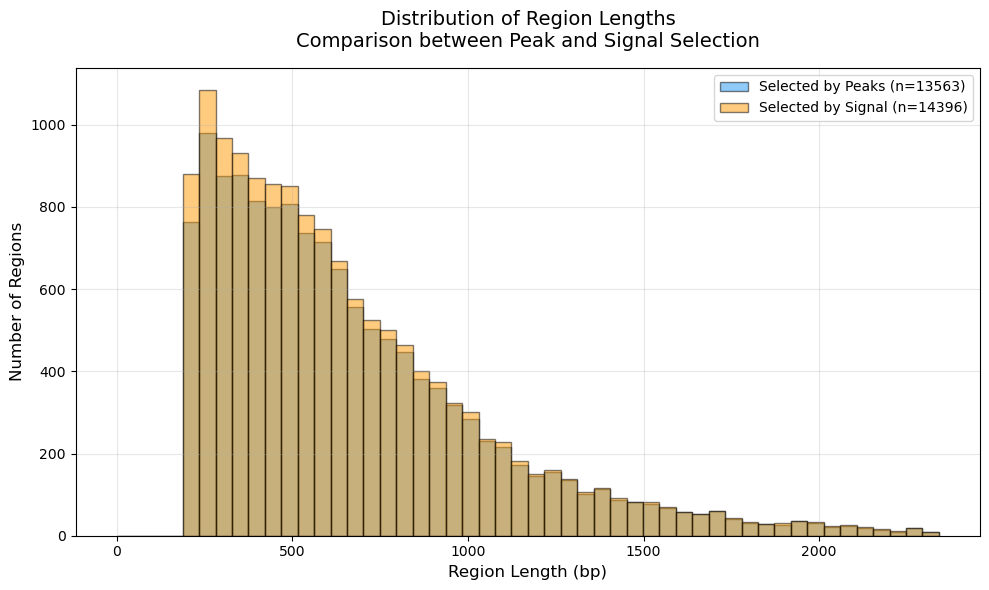

In [20]:
plot_region_length_comparison(both_df_by_peaks, both_df_by_signal, region_length_col='cpg_length')

In [21]:
both_df_sorted_by_cpg_length_peaks = both_df_by_peaks.sort_values(by='cpg_length', ascending=False)
both_df_sorted_by_cpg_length_peaks.head()
print_outlier_groups(both_df_sorted_by_cpg_length_peaks, "peaks")


First 5 outliers selected by peaks:
chr8:92,355,697-92,360,826                        enrichment: 0.8508029354291498
chr5:33,430,439-33,435,552                        enrichment: 0.6103361362211098
chrX:12,086,982-12,092,060                        enrichment: 1.183767499358089
chrX:12,076,861-12,081,915                        enrichment: 1.2249947719191188
chr17:34,118,396-34,122,981                       enrichment: 1.1590557534442023

Middle 5 outliers selected by peaks:
chr16:96,191,818-96,192,388                       enrichment: 1.4721743335195816
chr9:50,727,721-50,728,291                        enrichment: 2.059581426208984
chr6:148,895,887-148,896,457                      enrichment: 0.7672157262398679
chr2:26,206,330-26,206,900                        enrichment: 1.5373795758586952
chr10:44,268,176-44,268,746                       enrichment: 1.0736035535015689

Last 5 outliers selected by peaks:
chr5:135,903,608-135,903,809                      enrichment: 5.038894048723007
c

In [22]:
both_df_sorted_by_cpg_length_signal = both_df_by_signal.sort_values(by='cpg_length', ascending=False)
both_df_sorted_by_cpg_length_signal.head()
print_outlier_groups(both_df_sorted_by_cpg_length_signal, "signal")


First 5 outliers selected by signal:
chr8:92,355,697-92,360,826                        enrichment: 0.8508029354291498
chr5:33,430,439-33,435,552                        enrichment: 0.6103361362211098
chrX:12,086,982-12,092,060                        enrichment: 1.183767499358089
chrX:12,076,861-12,081,915                        enrichment: 1.2249947719191188
chr17:34,118,396-34,122,981                       enrichment: 1.1590557534442023

Middle 5 outliers selected by signal:
chr9:50,767,997-50,768,558                        enrichment: 0.8988686820448569
chr2:37,422,567-37,423,128                        enrichment: 1.5479054622655752
chrX:170,674,488-170,675,049                      enrichment: 31.172172899994404
chr11:54,955,743-54,956,304                       enrichment: 2.002065566551241
chr1:75,375,225-75,375,786                        enrichment: 0.3732835131029422

Last 5 outliers selected by signal:
chr10:85,388,358-85,388,559                       enrichment: 3.3270615672197


### IGV: examples

# Exo only

In [23]:
exo_only_df_by_peaks.head()

,chr,start,end,cpg_length,cpg_name,cpg_score,exo_signal,endo_signal,enrichment,pvalue,binding_type,binding_type_by_peaks,significant,exo_replicates_with_signal,endo_replicates_with_signal,total_exo_replicates,total_endo_replicates,exo_replicate_signals,endo_replicate_signals,n_exo_peaks,n_endo_peaks,exo_peak_scores_by_rep,endo_peak_scores_by_rep,analysis_start,analysis_end,analysis_length,exo_signal_std,endo_signal_std,exo_signal_cv,endo_signal_cv,exo_replicates_with_peaks,endo_replicates_with_peaks
15104,chrX,152782009,152782238,229,1750,CpG:,15.075305,0.0,inf,1.0,exo_only,exo_only,False,2,0,3,2,"0.0,23.84961900336253,21.376296584783162","0.0,0.0",1,0,3.29343;6.52181;2.75099,NaN,152782009,152782238,229,10.707566,0.0,0.710272,0.0,3,0
13247,chr8,46294425,46294897,472,938,CpG:,7.618446,0.0,inf,1.0,exo_only,exo_only,False,3,0,3,2,"3.488959336684922,18.938636093826617,0.4277426964145596","0.0,0.0",1,0,3.41764,NaN,46294425,46294897,472,8.101555,0.0,1.063413,0.0,1,0
13236,chr8,45044282,45044515,233,928,CpG:,24.115163,0.0,inf,1.0,exo_only,exo_only,False,3,0,3,2,"5.787115809231868,58.15997892387947,8.398394543725534","0.0,0.0",1,0,4.24902,NaN,45044282,45044515,233,24.096913,0.0,0.999243,0.0,1,0
13237,chr8,45051222,45051542,320,928,CpG:,55.372400,0.0,inf,1.0,exo_only,exo_only,False,3,0,3,2,"43.069904160499576,34.62135725021362,88.42593856751918","0.0,0.0",1,0,4.39045;6.03417;3.87258,NaN,45051222,45051542,320,23.625506,0.0,0.426666,0.0,3,0
3560,chr13,37930867,37931184,317,874,CpG:,23.581940,0.0,inf,1.0,exo_only,exo_only,False,3,0,3,2,"43.291004842764195,12.659328851790082,14.795486922519816","0.0,0.0",1,0,3.83814;4.16581,NaN,37930867,37931184,317,13.963672,0.0,0.592134,0.0,2,0


In [24]:
# Generate summary statistics for numeric columns, ignoring inf values
# Replace inf values with NaN before calculating statistics
numeric_cols = ['exo_signal', 'endo_signal', 'enrichment', 'cpg_length', 'pvalue']

stats_df = exo_only_df_by_peaks[numeric_cols].replace([np.inf, -np.inf], np.nan).describe()
print("Exo only - by peaks, size:", len(exo_only_df_by_peaks))
stats_df

Exo only - by peaks, size: 1261


,exo_signal,endo_signal,enrichment,cpg_length,pvalue
count,1261.000000,1261.000000,647.000000,1261.000000,1261.000000
mean,21.517422,3.398421,29.849597,448.306106,0.817076
std,17.606872,8.630722,109.989069,310.478767,0.252995
min,0.000000,0.000000,0.000000,201.000000,0.200000
25%,9.335757,0.000000,2.036760,246.000000,0.500000
50%,16.559335,0.122540,6.154638,339.000000,1.000000
75%,28.522820,2.919774,18.178979,519.000000,1.000000
max,117.536579,106.456329,1791.772860,2655.000000,1.000000


In [25]:
stats_df = exo_only_df_by_signal[numeric_cols].replace([np.inf, -np.inf], np.nan).describe()
print("Exo only - by signal, size:", len(exo_only_df_by_signal))
stats_df

Exo only - by signal, size: 747


,exo_signal,endo_signal,enrichment,cpg_length,pvalue
count,747.000000,747.0,0.0,747.000000,747.0
mean,20.082990,0.0,NaN,375.574297,1.0
std,17.159734,0.0,NaN,223.616169,0.0
min,0.073023,0.0,NaN,201.000000,1.0
25%,8.612277,0.0,NaN,233.000000,1.0
50%,15.000527,0.0,NaN,298.000000,1.0
75%,25.807414,0.0,NaN,423.000000,1.0
max,110.595575,0.0,NaN,2021.000000,1.0


In [26]:
print_across_distribution(exo_only_df_by_peaks, selection_type="peaks")


First 5 elements selected by peaks:
chrX:152,782,009-152,782,238                      enrichment: inf
chr8:46,294,425-46,294,897                        enrichment: inf
chr8:45,044,282-45,044,515                        enrichment: inf
chr8:45,051,222-45,051,542                        enrichment: inf
chr13:37,930,867-37,931,184                       enrichment: inf

Middle 5 elements selected by peaks:
chr3:88,643,984-88,644,204                        enrichment: 211.5021583704637
chr7:141,070,293-141,071,018                      enrichment: 185.9163463575256
chr10:127,079,603-127,080,375                     enrichment: 181.3426353808022
chr10:80,834,349-80,836,042                       enrichment: 161.42064873232138
chr5:115,482,797-115,483,106                      enrichment: 159.656379959265

Last 5 elements selected by peaks:
chr14:72,980,207-72,980,461                       enrichment: 0.1610492737807146
chr1:167,226,375-167,226,581                      enrichment: 0.15537109380251

In [27]:
print_across_distribution(exo_only_df_by_signal, selection_type="signal")


First 5 elements selected by signal:
chr1:9,848,165-9,848,530                          enrichment: inf
chrX:152,782,009-152,782,238                      enrichment: inf
chr12:112,909,106-112,909,372                     enrichment: inf
chr8:46,294,425-46,294,897                        enrichment: inf
chr8:45,044,282-45,044,515                        enrichment: inf

Middle 5 elements selected by signal:
chr17:22,876,643-22,876,863                       enrichment: inf
chr11:88,193,457-88,193,898                       enrichment: inf
chr7:28,466,632-28,467,711                        enrichment: inf
chr7:28,301,283-28,301,506                        enrichment: inf
chr7:30,453,876-30,454,191                        enrichment: inf

Last 5 elements selected by signal:
chrX:137,570,910-137,571,192                      enrichment: inf
chr12:112,178,042-112,178,291                     enrichment: inf
chr13:40,708,986-40,709,271                       enrichment: inf
chr13:47,010,853-47,011,096 

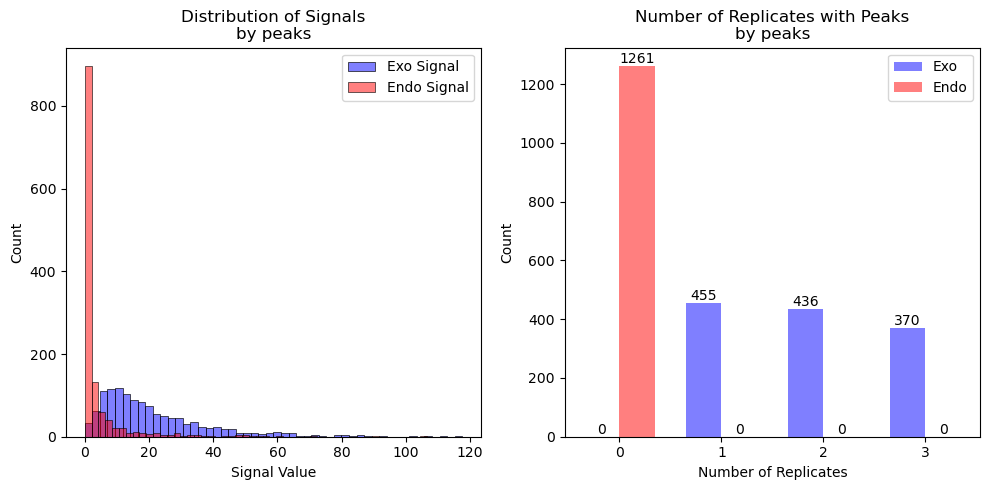

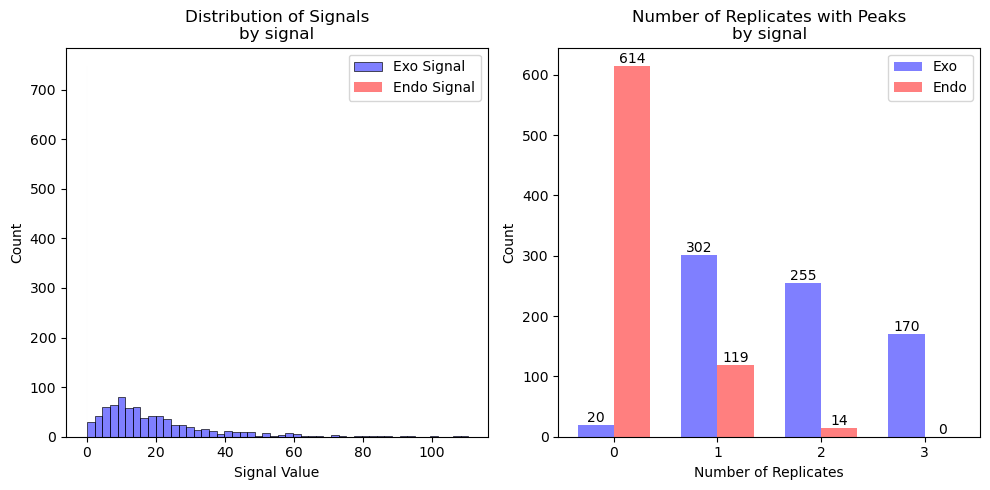

In [28]:
plot_exo_only_distributions_no_length_distribution(exo_only_df_by_peaks, title="by peaks")
plot_exo_only_distributions_no_length_distribution(exo_only_df_by_signal, title="by signal")

# Endo only

In [29]:
endo_only_df_by_peaks.head()

,chr,start,end,cpg_length,cpg_name,cpg_score,exo_signal,endo_signal,enrichment,pvalue,binding_type,binding_type_by_peaks,significant,exo_replicates_with_signal,endo_replicates_with_signal,total_exo_replicates,total_endo_replicates,exo_replicate_signals,endo_replicate_signals,n_exo_peaks,n_endo_peaks,exo_peak_scores_by_rep,endo_peak_scores_by_rep,analysis_start,analysis_end,analysis_length,exo_signal_std,endo_signal_std,exo_signal_cv,endo_signal_cv,exo_replicates_with_peaks,endo_replicates_with_peaks
7859,chr2,104556642,104556908,266,1382,CpG:,2.312516,0.0,inf,1.0,exo_only,endo_only,False,3,0,3,2,"3.386497479632385,1.0288284273075878,2.522222289465424","0.0,0.0",0,0,NaN,3.02183,104556642,104556908,266,0.973870,0.0,0.421130,0.0,0,1
11057,chr5,139553163,139553452,289,1649,CpG:,2.973485,0.0,inf,1.0,exo_only,endo_only,False,2,0,3,2,"6.389816439275511,2.530637381398554,0.0","0.0,0.0",0,1,NaN,8.49039;3.77035,139553163,139553452,289,2.627359,0.0,0.883596,0.0,0,2
3085,chr12,73034963,73035250,287,1142,CpG:,3.409912,0.0,inf,1.0,exo_only,endo_only,False,2,0,3,2,"0.0,5.359585363275083,4.87014969882234","0.0,0.0",0,0,NaN,7.44091,73034963,73035250,287,2.419437,0.0,0.709531,0.0,0,1
13545,chr8,85007611,85007956,345,1233,CpG:,0.380664,0.0,inf,1.0,exo_only,endo_only,False,1,0,3,2,"0.0,1.1419927002727122,0.0","0.0,0.0",0,1,NaN,8.14976,85007611,85007956,345,0.538341,0.0,1.414214,0.0,0,1
14959,chrX,93288436,93289354,918,1296,CpG:,1.508421,0.0,inf,1.0,exo_only,endo_only,False,2,0,3,2,"0.5212999979654948,4.003962972844608,0.0","0.0,0.0",0,0,NaN,5.77936,93288436,93289354,918,1.777402,0.0,1.178319,0.0,0,1


In [30]:
# Generate summary statistics for numeric columns, ignoring inf values
# Replace inf values with NaN before calculating statistics
numeric_cols = ['exo_signal', 'endo_signal', 'enrichment', 'cpg_length', 'pvalue']

stats_df = endo_only_df_by_peaks[numeric_cols].replace([np.inf, -np.inf], np.nan).describe()
print("endo only - by peaks, size:", len(endo_only_df_by_peaks))
stats_df

endo only - by peaks, size: 332


,exo_signal,endo_signal,enrichment,cpg_length,pvalue
count,332.000000,332.000000,312.000000,332.000000,332.000000
mean,4.794905,17.722431,1.173732,531.518072,0.679618
std,4.974785,20.300980,4.795725,464.478842,0.274378
min,0.000000,0.000000,0.000000,201.000000,0.200000
25%,1.757302,4.837467,0.109012,259.750000,0.500000
50%,3.590208,11.707779,0.246875,335.500000,0.666667
75%,6.273840,23.555454,0.641092,618.000000,1.000000
max,52.074108,207.986741,76.400352,3882.000000,1.000000


In [31]:
stats_df = endo_only_df_by_signal[numeric_cols].replace([np.inf, -np.inf], np.nan).describe()
print("endo only - by signal, size:", len(endo_only_df_by_signal))
stats_df

endo only - by signal, size: 13


,exo_signal,endo_signal,enrichment,cpg_length,pvalue
count,13.0,13.000000,13.0,13.000000,13.0
mean,0.0,31.477706,0.0,232.923077,1.0
std,0.0,54.688706,0.0,28.482338,0.0
min,0.0,1.843406,0.0,202.000000,1.0
25%,0.0,4.116051,0.0,211.000000,1.0
50%,0.0,16.849286,0.0,225.000000,1.0
75%,0.0,32.162803,0.0,256.000000,1.0
max,0.0,207.986741,0.0,281.000000,1.0


In [32]:
print_across_distribution(endo_only_df_by_peaks, selection_type="peaks")


First 5 elements selected by peaks:
chr2:104,556,642-104,556,908                      enrichment: inf
chr5:139,553,163-139,553,452                      enrichment: inf
chr12:73,034,963-73,035,250                       enrichment: inf
chr8:85,007,611-85,007,956                        enrichment: inf
chrX:93,288,436-93,289,354                        enrichment: inf

Middle 5 elements selected by peaks:
chr6:52,245,220-52,246,577                        enrichment: 0.2720184591096268
chr18:74,442,474-74,443,028                       enrichment: 0.2716638092802473
chr13:51,202,641-51,203,047                       enrichment: 0.2685934410371859
chr7:143,437,811-143,438,545                      enrichment: 0.2681595362602904
chr19:23,892,738-23,893,830                       enrichment: 0.2674561441332442

Last 5 elements selected by peaks:
chr5:119,844,997-119,845,222                      enrichment: 0.0
chr19:28,763,321-28,763,534                       enrichment: 0.0
chr3:107,343,037-107,3

In [33]:
print_across_distribution(endo_only_df_by_signal, selection_type="signal")


First 5 elements selected by signal:
chr2:179,975,288-179,975,568                      enrichment: 0.0
chr13:94,875,360-94,875,562                       enrichment: 0.0
chr3:89,393,042-89,393,245                        enrichment: 0.0
chr4:154,141,473-154,141,729                      enrichment: 0.0
chr4:3,230,990-3,231,230                          enrichment: 0.0

Middle 5 elements selected by signal:
chr4:3,230,990-3,231,230                          enrichment: 0.0
chr15:103,035,731-103,035,967                     enrichment: 0.0
chr5:119,844,997-119,845,222                      enrichment: 0.0
chr13:93,674,272-93,674,553                       enrichment: 0.0
chr15:74,563,907-74,564,167                       enrichment: 0.0

Last 5 elements selected by signal:
chr15:74,563,907-74,564,167                       enrichment: 0.0
chr19:28,763,321-28,763,534                       enrichment: 0.0
chr3:107,343,037-107,343,254                      enrichment: 0.0
chr19:43,600,902-43,601,106 

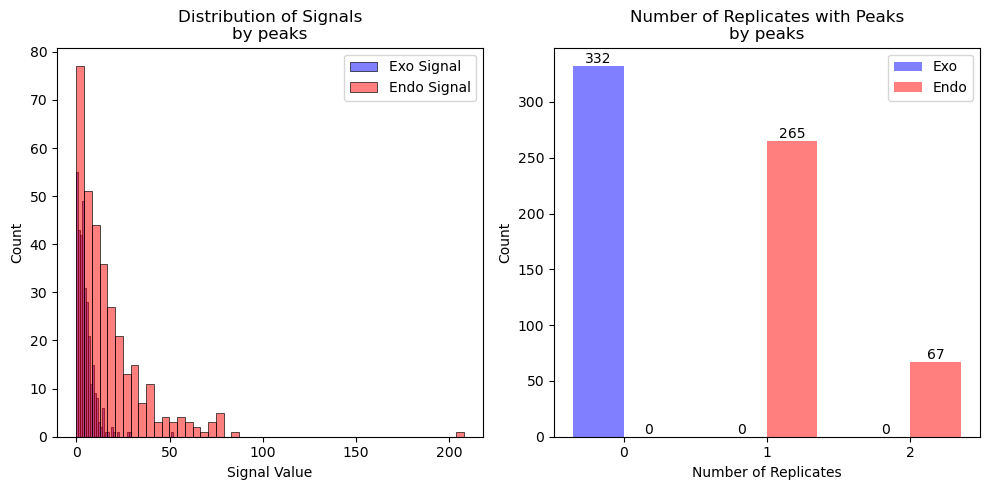

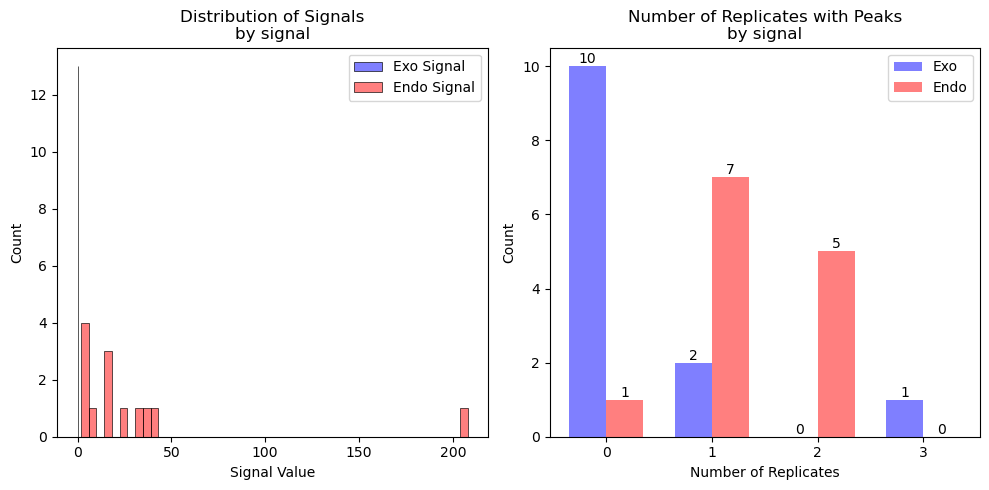

In [34]:
plot_exo_only_distributions_no_length_distribution(endo_only_df_by_peaks, title="by peaks")
plot_exo_only_distributions_no_length_distribution(endo_only_df_by_signal, title="by signal")